In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 현재 경로 확인
!pwd

/content/drive/My Drive/Colab Notebooks


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content/drive/My Drive/Colab Notebooks


## AutoEncoder

In [1]:
import tensorflow as tf 

In [2]:
(X_train, _), (X_test,_) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

X_train = X_train/255
X_test = X_test/255

4431872/4422102 [==============================] - 0s 0us/step


In [33]:
class MyModel(tf.keras.models.Model):
  def __init__(self, dim):
    super(MyModel, self).__init__() # MyModel의 부모 객체를 불러와 init를 실행한다 
    self.dim = dim 
    self.encoder = tf.keras.layers.Dense(dim)
    self.decoder = tf.keras.layers.Dense(28*28, activation='sigmoid')
    # self.encoder = tf.keras.models.Sequential([ # 모델 안에 모델 넣는 방법 
    #     tf.keras.layers.Flatten(), # encoder 안에서 flatten 
    #     tf.keras.layers.Dense(dim, activation='relu')
    # ])
    # self.decoder = tf.keras.models.Sequential([
    #     tf.keras.layers.Dense(28*28, activation='sigmoid'),
    #     tf.keras.layers.Reshape(28,28)
    # ])

  def call(self, input_):
    x = self.encoder(input_)
    x = self.decoder(x)
    return x  

In [14]:
autoencoder = MyModel(32)

In [15]:
autoencoder.compile(loss=tf.keras.losses.MeanSquaredError())

In [16]:
autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0157
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0140
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0134
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0131
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0129
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0128
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0128
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0127
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0127
Epoch 11/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0126
Epoch 12/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0126
E

In [39]:
autoencoder.encoder, autoencoder.decoder # 상속을 통해서 만들면 더 유연한 모델을 만들 수 있다 

(<keras.engine.sequential.Sequential at 0x7fdfc49ca910>,
 <keras.engine.sequential.Sequential at 0x7fdfc7feec90>)

## Convolutional autoencoder

In [19]:
(X_train, _), (X_test,_) = tf.keras.datasets.fashion_mnist.load_data()

In [20]:
X_train[..., tf.newaxis].shape

(60000, 28, 28, 1)

In [21]:
tf.expand_dims(X_train, axis=-1)
X_train = X_train.reshape(60000, 28,28,1)

In [22]:
X_test = X_test.reshape(10000,28,28,1)

In [23]:
input_ = tf.keras.Input((28,28,1))

In [55]:
x = tf.keras.layers.Conv2D(16,3, padding='same', activation='relu')(input_)
x = tf.keras.layers.MaxPooling2D(2,2, padding='same')(x)
x = tf.keras.layers.Conv2D(8,3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2, padding='same')(x)
x = tf.keras.layers.Conv2D(8,3, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2, padding='same')(x)

x = tf.keras.layers.Conv2D(8,3, padding='same', activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2,2))(x)
x = tf.keras.layers.Conv2D(8,3, padding='same', activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2,2))(x)
x = tf.keras.layers.Conv2D(16,3, activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2,2))(x)
# x = tf.keras.layers.Conv2D(16,3, padding='same', activation='relu')(x)

In [56]:
model = tf.keras.models.Model(input_,x)

In [57]:
model.summary() # 중간에 복원하는 과정이 맞지 않아도 학습을 통해서 최종결과에서 틀린 것을 보완된다 / Conv2DTranspose(deconvolution)을 사용하면 완전히 복원 가능하긴 하다 

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 8)           0   

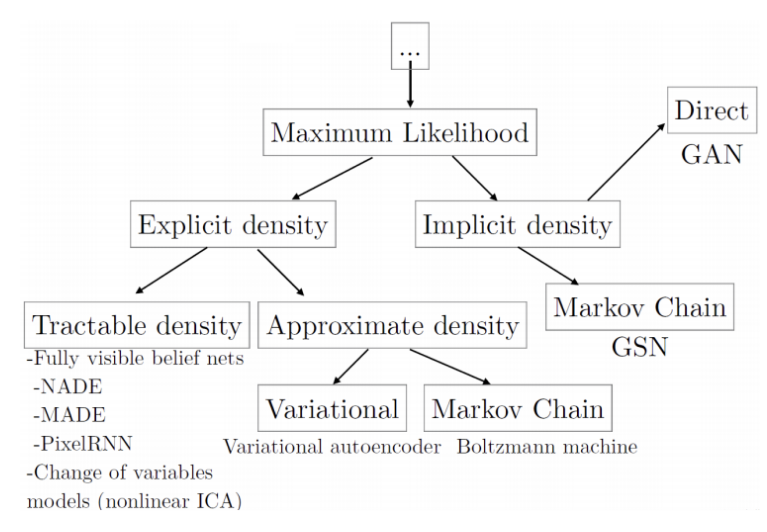

## Variational AutoEncoder

> 숨어 있는 확률 분포가 복잡할 경우 <br> 
> 데이터의 분포를 정규분포와 가능한 오차가 적은 방향으로 분포를 구한다 <br>

### Likelihood

> 어떤 모델에서 해당 데이터(관측값)이 나올 확률

### Maximum Likelihood 

> 현재 가지고 있는 데이터셋이 나올 확률을 최대화하는 방향으로 확률 분포를 구하는 방법

```
데이터가 1, 4, 5, 6, 9가 있다고 가정했을 때
```

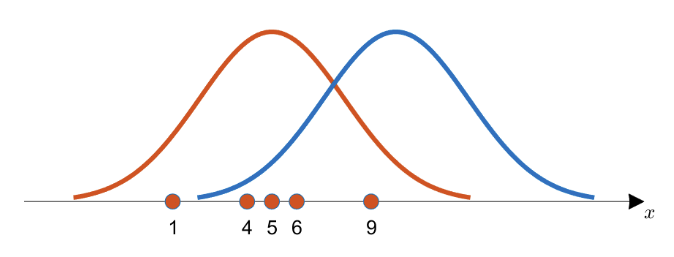

```
주황색 확률분포로 부터 데이터들을 얻었을 가능성이 더 클 것이다
왜냐하면 획득한 데이터들의 분포가 주황색 확률분포의 중심에 더 일치하는 것 처럼 보이기 때문이다

단, 주어진 데이터 샘플이 편향된 경우 추정된 확률 분포가 실제 상황을 표현하기에 부적합한 확률 분포가 될 수 있다 
```

### Maximum A Posterior

> 사전 지식에 근거하여(과거의 경험) 실제 데이터의 분포가 어떠 할 것이다 라고 예측하는 방법

```
동전 던지기를 예로 들면 
동전을 10번 던져서 모두 앞면이 나온다고 하더라도, 
동전의 앞면과 뒷면이 나올 확률이 0.5로 동일할거라는 사전지식이 동시에 작용하기 때문에
동전의 뒷면이 나올 확률이 0%가 되지 않도록 확률 분포를 구하는데 영향을 끼친다 
따라서 올바른 사전지식을 가지는 것이 중요하며 올바른 사전지식을 활용하는 경우 MLE보다 더 나은 모수(평균, 표준편차등) 파라미터를 추정할 수 있다 
```

## 생성 모델 

```
숨어 있는 분포를 알 수 있으면 데이터를 생성할 수 있다 

예를 들어 숫자의 잠재적인 의미 즉 필체를 나타내는 잠재변수인 각도, aspect ratio등으로 부터 숫자를 만들어 낼 수 있다 
```

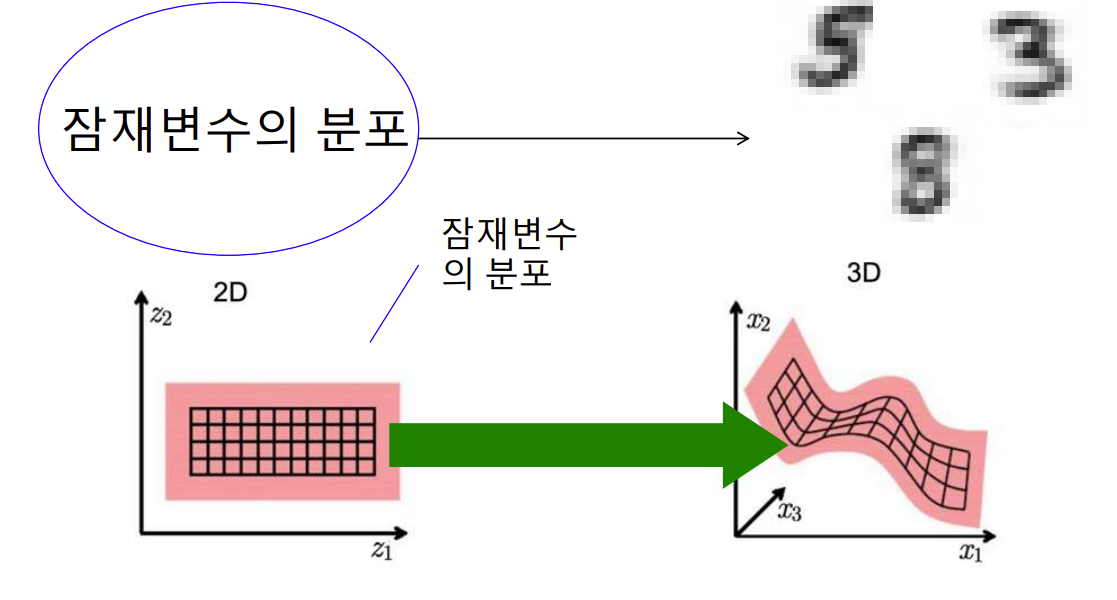

```
다차원의 아주 큰 분포를 더 작은 분포로 표현할 수 있는데 
더 작은 분포를 찾으면 다차원의 데이터 분포를 가진 데이터를 생성 할 수 있다 
```

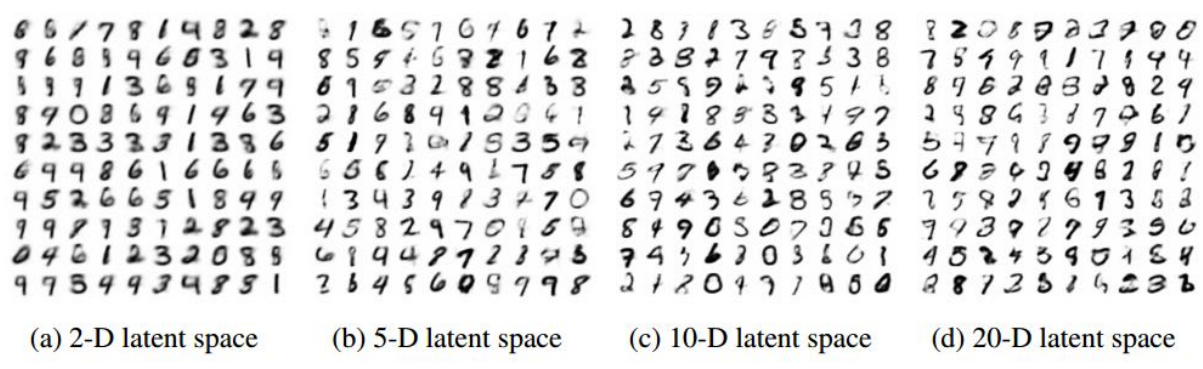

```
작은 latent space를 통해 학습된 모델에서도 데이터를 잘 표현하는 데이터를 생성할 수 있다 

※ 잠재 공간(latent space): 어떠한 관측 데이터 혹은 입력 데이터가 있을 때 그 데이터 들을 대표할 수 있는 함축된 데이터 공간 또는 집합을 잠재 공간이라고 한다
```

### AutoEncoder의 생성 모델적 의미 

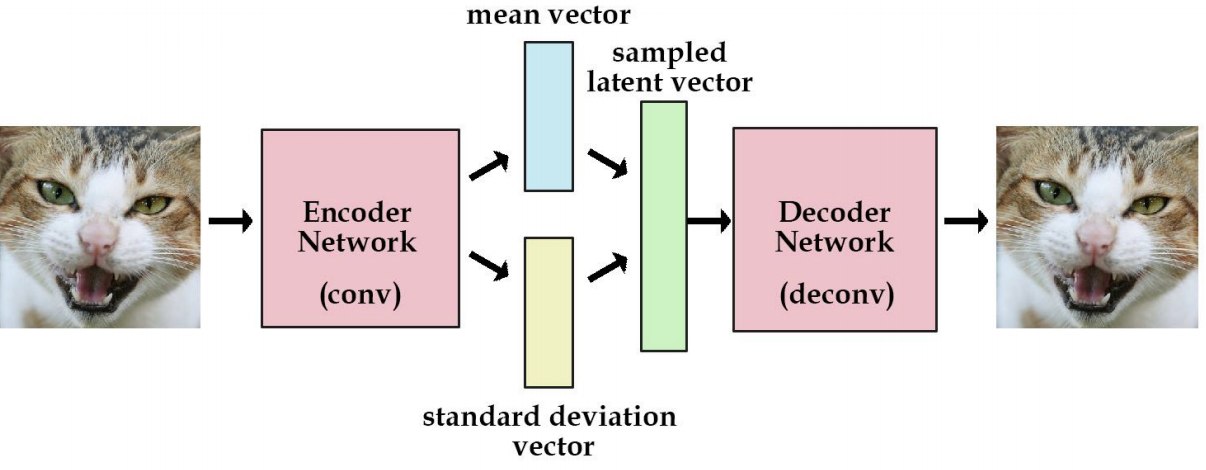

```
Encoder를 이용해서 복잡한 분포로 부터 정규분포를 알아내고 
정규 분포로부터 숨어 있는 작은 분포를 찾아낸다(latent space)   
이렇게 알아낸 latent space로부터 decoder를 활용하여 원래의 데이터를 복원한다 
```

## 왜도와 첨도

```python
1. 왜도(skewness) 
- 분포의 비대칭성을 나타내는 척도 
2. 첨도(kurtosis)
- 분포의 뾰족한 정도를 나타내는 척도
```

## 왜도

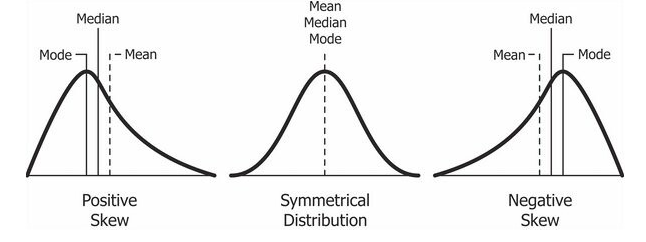

## 첨도

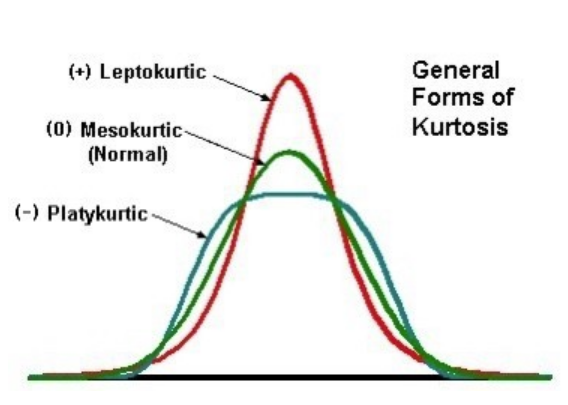

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
data = iris.iloc[:,:-1]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

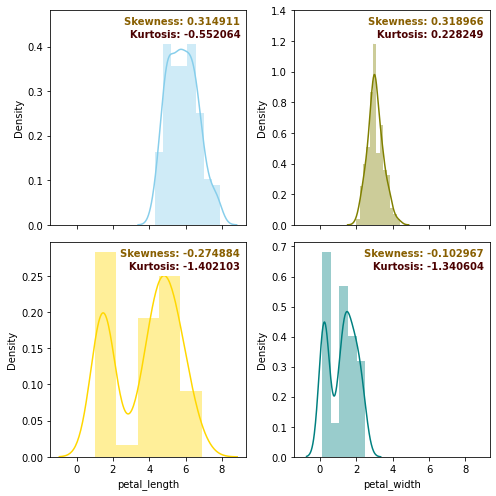

In [63]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(data.iloc[:,0], color="skyblue", ax=axes[0,0])
sns.distplot(data.iloc[:,1], color="olive", ax=axes[0,1])
sns.distplot(data.iloc[:,2], color="gold", ax=axes[1,0])
sns.distplot(data.iloc[:,3], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % data.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % data.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()